# 📔 BERT for Question Answering

This notebook explores using the BERT (Bidirectional Encoder Representations from Transformers) model for answering questions posed against a context.

## 📦 Setup and Imports

In [ ]:
import torch
from transformers import BertForQuestionAnswering, BertTokenizerFast
from scipy.special import softmax
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 👨‍🍳 Data Preparation

Defining the context and question that will be used to demonstrate the BERT model's question-answering capabilities.

In [2]:
context = '''Mars is the fourth planet from the Sun. The surface of Mars is orange-red because it is covered in iron oxide dust, giving it the nickname "the Red Planet". Mars is among the brightest objects in Earth's sky, and its high-contrast albedo features have made it a common subject for telescope viewing. It is classified as a terrestrial planet and is the second smallest of the Solar System's planets with a diameter of 6,779 km (4,212 mi). In terms of orbital motion, a Martian solar day (sol) is equal to 24.5 hours, and a Martian solar year is equal to 1.88 Earth years (687 Earth days). Mars has two natural satellites that are small and irregular in shape: Phobos and Deimos.'''

In [3]:
question = '''Why is Mars's surface orange-red?'''

## 🤖 Model Setup

Loading the BERT model and tokenizer designed for question answering tasks.

In [4]:
model_name = "deepset/bert-base-cased-squad2"

In [5]:
tokenizer = BertTokenizerFast.from_pretrained(model_name)
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 💬 Question Answering

Tokenizing the context and the question, and performing inference to get model predictions.

In [6]:
inputs = tokenizer(question, context, return_tensors='pt')

In [7]:
tokenizer.tokenize(context)

['Mars',
 'is',
 'the',
 'fourth',
 'planet',
 'from',
 'the',
 'Sun',
 '.',
 'The',
 'surface',
 'of',
 'Mars',
 'is',
 'orange',
 '-',
 'red',
 'because',
 'it',
 'is',
 'covered',
 'in',
 'iron',
 'oxide',
 'dust',
 ',',
 'giving',
 'it',
 'the',
 'nickname',
 '"',
 'the',
 'Red',
 'Planet',
 '"',
 '.',
 'Mars',
 'is',
 'among',
 'the',
 'bright',
 '##est',
 'objects',
 'in',
 'Earth',
 "'",
 's',
 'sky',
 ',',
 'and',
 'its',
 'high',
 '-',
 'contrast',
 'al',
 '##bed',
 '##o',
 'features',
 'have',
 'made',
 'it',
 'a',
 'common',
 'subject',
 'for',
 'telescope',
 'viewing',
 '.',
 'It',
 'is',
 'classified',
 'as',
 'a',
 'terrestrial',
 'planet',
 'and',
 'is',
 'the',
 'second',
 'smallest',
 'of',
 'the',
 'Solar',
 'System',
 "'",
 's',
 'planets',
 'with',
 'a',
 'diameter',
 'of',
 '6',
 ',',
 '77',
 '##9',
 'km',
 '(',
 '4',
 ',',
 '212',
 'mi',
 ')',
 '.',
 'In',
 'terms',
 'of',
 'orbital',
 'motion',
 ',',
 'a',
 'Martian',
 'solar',
 'day',
 '(',
 'so',
 '##l',
 ')',


In [8]:
len(tokenizer.tokenize(context))

166

## 🏃‍♂️ Running the model and getting the start and end scores

In [9]:
with torch.no_grad():
  outputs = model(**inputs)

In [10]:
start_scores = softmax(outputs.start_logits)[0]
start_scores

array([2.0014255e-03, 1.5604926e-06, 1.2231894e-06, 3.4202558e-06,
       7.2055326e-07, 6.8492585e-07, 1.1704460e-06, 1.5586662e-06,
       8.2280974e-07, 5.0587624e-07, 6.7996524e-07, 8.6587198e-07,
       2.3632896e-05, 8.9089554e-07, 1.4002848e-06, 1.1875006e-05,
       8.7150374e-07, 7.8483112e-07, 1.1808753e-06, 8.4442456e-07,
       6.5416566e-07, 2.5243387e-05, 2.4411374e-05, 1.0415185e-06,
       6.7582514e-05, 1.9840847e-06, 5.7631482e-06, 9.6993415e-07,
       2.4049109e-06, 5.3849685e-01, 4.0327263e-01, 6.5456919e-04,
       2.7484864e-02, 3.1921070e-05, 2.7298752e-02, 1.7349692e-05,
       1.4586760e-04, 9.0782642e-06, 5.2416040e-06, 7.4715012e-06,
       3.5204062e-06, 6.1712913e-06, 2.4356263e-05, 3.7039335e-05,
       1.1514980e-04, 2.5337099e-06, 2.2415252e-06, 6.5047570e-06,
       6.4385429e-05, 8.5592956e-07, 1.2258263e-06, 8.9336112e-07,
       1.2624437e-06, 5.8894142e-07, 6.2223836e-07, 8.0403618e-07,
       1.2276981e-06, 6.2467495e-07, 5.1685333e-07, 6.1045580e

In [11]:
len(start_scores)

179

In [12]:
end_scores = softmax(outputs.end_logits)[0]
end_scores

array([8.1725966e-04, 6.7849800e-07, 3.5166158e-07, 3.6366282e-07,
       5.7046782e-07, 5.8081685e-07, 4.4890780e-07, 3.3146191e-07,
       4.5076064e-07, 1.0505756e-06, 8.3798659e-07, 6.2732198e-07,
       6.6733514e-07, 4.1849552e-07, 3.0247605e-07, 1.8875893e-06,
       8.9771839e-07, 5.2691416e-07, 3.3874772e-07, 1.9162744e-06,
       7.3794462e-07, 2.4679701e-07, 2.0729829e-06, 4.4775720e-07,
       1.1731300e-06, 2.8425131e-07, 5.2213409e-07, 4.5155056e-07,
       2.2555041e-06, 4.3309890e-05, 3.3716799e-06, 1.6966696e-06,
       1.3189668e-04, 9.2389273e-06, 2.1519225e-05, 3.9062725e-05,
       9.6353865e-01, 2.9659936e-02, 3.4255388e-07, 2.6019088e-06,
       1.9267847e-07, 8.0728000e-07, 4.8568467e-07, 3.8080546e-07,
       6.9528896e-06, 2.3145026e-03, 2.3440877e-03, 9.6195203e-04,
       4.9742664e-07, 4.5260728e-07, 3.5770327e-07, 4.0460446e-07,
       3.7876018e-07, 6.8519887e-07, 6.7674347e-07, 4.2695439e-07,
       3.5424395e-07, 5.2847776e-07, 6.6144759e-07, 1.2398147e

In [13]:
len(end_scores)

179

In [14]:
179 * 2

358

## 🎯 Visualization of Token Scores

Plotting the scores associated with each token to understand the model's decision-making process.

In [ ]:
scores_df = pd.DataFrame({'token position': list(range(len(start_scores))) * 2,
                          'score': list(start_scores) + list(end_scores),
                          'score type': ['start'] * len(start_scores) + ['end'] * len(end_scores)})
scores_df

,token position,score,score type
0,0,2.001425e-03,start
1,1,1.560493e-06,start
2,2,1.223189e-06,start
3,3,3.420256e-06,start
4,4,7.205533e-07,start
...,...,...,...
353,174,3.268613e-07,end
354,175,4.430115e-07,end
355,176,8.892097e-07,end
356,177,8.463288e-07,end


In [16]:
pivot_df = scores_df.pivot(index='token position',
                           columns='score type',
                           values='score')

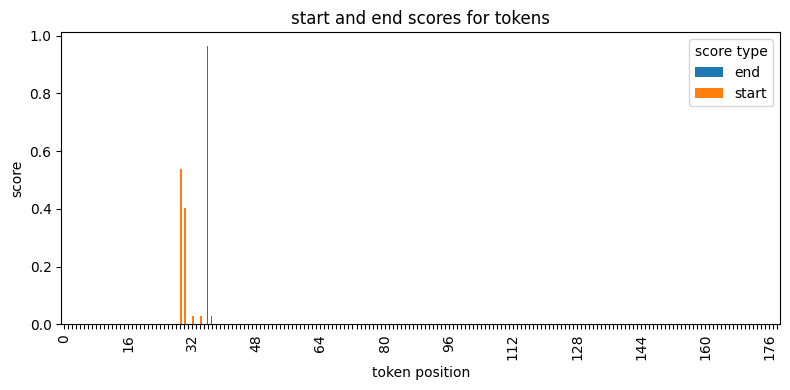

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
pivot_df.plot(kind='bar', width=0.8, ax=ax)

plt.title('start and end scores for tokens')
plt.xlabel('token position')
plt.ylabel('score')

for i, label in enumerate(ax.xaxis.get_ticklabels()):
  if i % 16 != 0:
    label.set_visible(False)

plt.legend(title='score type')
plt.tight_layout()
plt.show()

In [18]:
px.bar(scores_df,
       x='token position',
       y='score',
       color='score type',
       barmode='group',
       title='start and end scores for tokens')

## 🔬 Extracting the Answer

Identifying the tokens that comprise the answer based on the highest start and end scores.

In [19]:
start_idx = np.argmax(start_scores)
start_idx

np.int64(29)

In [20]:
end_idx = np.argmax(end_scores)
end_idx

np.int64(36)

In [21]:
answer_ids = inputs.input_ids[0][start_idx: end_idx + 1]
answer_ids

tensor([ 1272,  1122,  1110,  2262,  1107,  3926, 17151,  6693])

In [22]:
answer_tokens = tokenizer.convert_ids_to_tokens(answer_ids)
answer_tokens

['because', 'it', 'is', 'covered', 'in', 'iron', 'oxide', 'dust']

In [23]:
answer = tokenizer.convert_tokens_to_string(answer_tokens)
answer

'because it is covered in iron oxide dust'

In [24]:
question, answer

("Why is Mars's surface orange-red?",
 'because it is covered in iron oxide dust')

## 🪄 Defining a function to predict the answer to a question given a context

In [25]:
def predict_answer(context, question):
  inputs = tokenizer(question,
                     context,
                     return_tensors='pt',
                     truncation=True,
                     max_length=512)

  with torch.no_grad():
    outputs = model(**inputs)

  start_scores = softmax(outputs.start_logits)[0]
  end_scores = softmax(outputs.end_logits)[0]

  start_idx = np.argmax(start_scores)
  end_idx = np.argmax(end_scores)

  confidence_score = (start_scores[start_idx] + end_scores[end_idx]) / 2

  answer_ids = inputs.input_ids[0][start_idx:end_idx + 1]
  answer_tokens = tokenizer.convert_ids_to_tokens(answer_ids)
  answer = tokenizer.convert_tokens_to_string(answer_tokens)

  if answer != tokenizer.cls_token:
    return answer, confidence_score

  return 'no answer found', confidence_score

## 🧮 Evaluating the Function

Testing the `predict_answer` function with various questions and contexts.

In [26]:
context = '''Since the late 20th century, Mars has been explored by uncrewed spacecraft and rovers, with the first flyby by the Mariner 4 probe in 1965, the first orbit by the Mars 2 probe in 1971, and the first landing by the Viking 1 probe in 1976. As of 2023, there are at least 11 active probes orbiting Mars or on the Martian surface. Mars is an attractive target for future human exploration missions, though in the 2020s no such mission is planned.'''

In [27]:
len(tokenizer.tokenize(context))

100

In [28]:
predict_answer(context, 'How many active probes are currently orbiting Mars?')

('11', np.float32(0.89587927))

In [29]:
predict_answer(context, 'Since when has Mars been explored?')

('late 20th century', np.float32(0.706227))

## 🚨 Maximum allowed sequence length

In [30]:
context = '''The Solar System is the gravitationally bound system of the Sun and the objects that orbit it. It formed about 4.6 billion years ago when a dense region of a molecular cloud collapsed, forming the Sun and a protoplanetary disc. The Sun is a typical star that maintains a balanced equilibrium by the fusion of hydrogen into helium at its core, releasing this energy from its outer photosphere. Astronomers classify it as a G-type main-sequence star.
The largest objects that orbit the Sun are the eight planets. In order from the Sun, they are four terrestrial planets (Mercury, Venus, Earth and Mars); two gas giants (Jupiter and Saturn); and two ice giants (Uranus and Neptune). All terrestrial planets have solid surfaces. Inversely, all giant planets do not have a definite surface, as they are mainly composed of gases and liquids. Over 99.86% of the Solar System's mass is in the Sun and nearly 90% of the remaining mass is in Jupiter and Saturn.
There is a strong consensus among astronomers that the Solar System has at least nine dwarf planets: Ceres, Orcus, Pluto, Haumea, Quaoar, Makemake, Gonggong, Eris, and Sedna. There are a vast number of small Solar System bodies, such as asteroids, comets, centaurs, meteoroids, and interplanetary dust clouds. Some of these bodies are in the asteroid belt (between Mars's and Jupiter's orbit) and the Kuiper belt (just outside Neptune's orbit). Six planets, seven dwarf planets, and other bodies have orbiting natural satellites, which are commonly called 'moons'.
The Solar System is constantly flooded by the Sun's charged particles, the solar wind, forming the heliosphere. Around 75–90 astronomical units from the Sun, the solar wind is halted, resulting in the heliopause. This is the boundary of the Solar System to interstellar space. The outermost region of the Solar System is the theorized Oort cloud, the source for long-period comets, extending to a radius of 2,000–200,000 AU. The closest star to the Solar System, Proxima Centauri, is 4.25 light-years (269,000 AU) away. Both stars belong to the Milky Way galaxy.
The Sun is the star at the center of the Solar System. It is a massive, nearly perfect sphere of hot plasma, heated to incandescence by nuclear fusion reactions in its core, radiating the energy from its surface mainly as visible light and infrared radiation with 10% at ultraviolet energies. It is by far the most important source of energy for life on Earth. The Sun has been an object of veneration in many cultures. It has been a central subject for astronomical research since antiquity.'''

In [31]:
len(tokenizer.tokenize(context))

Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors


605

## 🤹‍♂️ Chunking sentences to handle longer contexts

This technique involves dividing a long text into smaller, overlapping chunks or segments, each within the token limit, to ensure that BERT can process the text while retaining as much context as possible.

In [32]:
def chunk_sentences(sentences, chunk_size, stride):
  chunks = []
  num_sentences = len(sentences)

  for i in range(0, num_sentences, chunk_size - stride):
    chunk = sentences[i: i + chunk_size]
    chunks.append(chunk)

  return chunks

In [33]:
example_sentences = '''example sentence 1. example sentence 2. example sentence 3. example sentence 4.'''

In [34]:
example_sentences.split('.')

['example sentence 1',
 ' example sentence 2',
 ' example sentence 3',
 ' example sentence 4',
 '']

In [35]:
chunk_sentences(example_sentences, chunk_size=3, stride=1)

['exa',
 'amp',
 'ple',
 'e s',
 'sen',
 'nte',
 'enc',
 'ce ',
 ' 1.',
 '. e',
 'exa',
 'amp',
 'ple',
 'e s',
 'sen',
 'nte',
 'enc',
 'ce ',
 ' 2.',
 '. e',
 'exa',
 'amp',
 'ple',
 'e s',
 'sen',
 'nte',
 'enc',
 'ce ',
 ' 3.',
 '. e',
 'exa',
 'amp',
 'ple',
 'e s',
 'sen',
 'nte',
 'enc',
 'ce ',
 ' 4.',
 '.']

In [36]:
context

"The Solar System is the gravitationally bound system of the Sun and the objects that orbit it. It formed about 4.6 billion years ago when a dense region of a molecular cloud collapsed, forming the Sun and a protoplanetary disc. The Sun is a typical star that maintains a balanced equilibrium by the fusion of hydrogen into helium at its core, releasing this energy from its outer photosphere. Astronomers classify it as a G-type main-sequence star.\nThe largest objects that orbit the Sun are the eight planets. In order from the Sun, they are four terrestrial planets (Mercury, Venus, Earth and Mars); two gas giants (Jupiter and Saturn); and two ice giants (Uranus and Neptune). All terrestrial planets have solid surfaces. Inversely, all giant planets do not have a definite surface, as they are mainly composed of gases and liquids. Over 99.86% of the Solar System's mass is in the Sun and nearly 90% of the remaining mass is in Jupiter and Saturn.\nThere is a strong consensus among astronomers

In [37]:
sentences = context.split('\n')
sentences

['The Solar System is the gravitationally bound system of the Sun and the objects that orbit it. It formed about 4.6 billion years ago when a dense region of a molecular cloud collapsed, forming the Sun and a protoplanetary disc. The Sun is a typical star that maintains a balanced equilibrium by the fusion of hydrogen into helium at its core, releasing this energy from its outer photosphere. Astronomers classify it as a G-type main-sequence star.',
 "The largest objects that orbit the Sun are the eight planets. In order from the Sun, they are four terrestrial planets (Mercury, Venus, Earth and Mars); two gas giants (Jupiter and Saturn); and two ice giants (Uranus and Neptune). All terrestrial planets have solid surfaces. Inversely, all giant planets do not have a definite surface, as they are mainly composed of gases and liquids. Over 99.86% of the Solar System's mass is in the Sun and nearly 90% of the remaining mass is in Jupiter and Saturn.",
 "There is a strong consensus among astr

In [38]:
chunked_sentences = chunk_sentences(sentences, chunk_size=3, stride=1)
chunked_sentences

[['The Solar System is the gravitationally bound system of the Sun and the objects that orbit it. It formed about 4.6 billion years ago when a dense region of a molecular cloud collapsed, forming the Sun and a protoplanetary disc. The Sun is a typical star that maintains a balanced equilibrium by the fusion of hydrogen into helium at its core, releasing this energy from its outer photosphere. Astronomers classify it as a G-type main-sequence star.',
  "The largest objects that orbit the Sun are the eight planets. In order from the Sun, they are four terrestrial planets (Mercury, Venus, Earth and Mars); two gas giants (Jupiter and Saturn); and two ice giants (Uranus and Neptune). All terrestrial planets have solid surfaces. Inversely, all giant planets do not have a definite surface, as they are mainly composed of gases and liquids. Over 99.86% of the Solar System's mass is in the Sun and nearly 90% of the remaining mass is in Jupiter and Saturn.",
  "There is a strong consensus among a

In [41]:
questions = ['What is the Solar System?',
             'What is the Sun?',
             'Where is the Sun located in the Solar System?',
             'Is Pluto a planet?']

In [42]:
answers = {}

for chunk in chunked_sentences:
  sub_context = '\n'.join(chunk)
  for question in questions:
    answer, score = predict_answer(sub_context, question)

    if answer:
      if question not in answers:
        answers[question] = (answer, score)

    else:
      if score > answers[question][1]:
        answers[question] = (answer, score)

for question, (answer, confidence) in answers.items():
  print(f'question: {question}')
  print(f'answer: {answer}')
  print(f'confidence: {confidence}')
  print()

question: What is the Solar System?
answer: the gravitationally bound system of the Sun
confidence: 0.8730259537696838

question: What is the Sun?
answer: a typical star that maintains a balanced equilibrium by the fusion of hydrogen into helium at its core
confidence: 0.9114236831665039

question: Where is the Sun located in the Solar System?
answer: gravitationally bound system
confidence: 0.547218918800354

question: Is Pluto a planet?
answer: no answer found
confidence: 0.6859089136123657

